# **Machine Learning**

From Udemy course '**Learning Phyton for Data Analysis and Visualization**' by Jose Portilla

### **4. Support Vector Machines (SVM)**

In [94]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
sns. set_style('whitegrid')
%matplotlib inline
from sklearn.datasets import load_boston

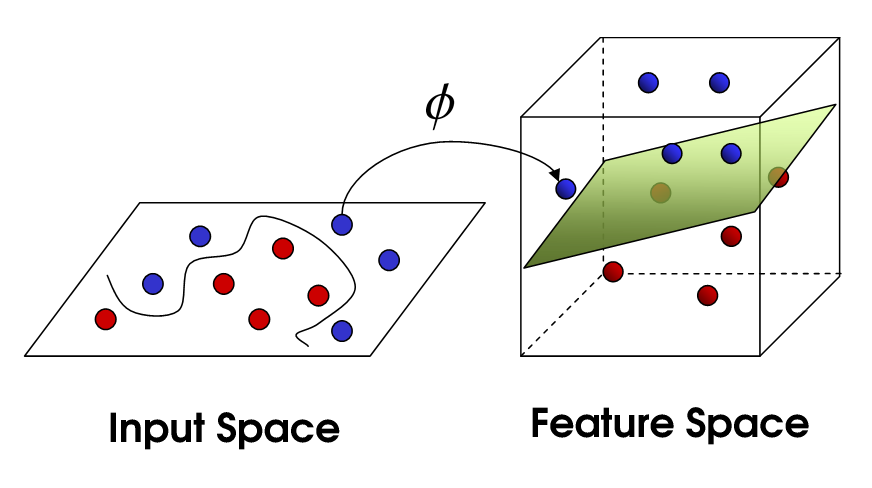

In [95]:
from IPython.display import Image
# Kernel Trick for the Feature Space
url='http://i.imgur.com/WuxyO.png'
Image(url)

**Note, we won't use seaborn due to a plot at the end!**

In [96]:
from sklearn import datasets

**Load the iris datasets!**

In [97]:
iris = datasets.load_iris()

**Grab features (X) and the Target (Y)!**

In [98]:
X = iris.data
Y = iris.target

**Show the Built-in Data Description!**

In [99]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

**Support Vector Machine Imports**

In [100]:
from sklearn.svm import SVC

**Fit a SVM model to the data !**

In [101]:
model = SVC()

**Split the data into Training and Testing sets and fit the model!**

In [102]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)
model.fit(X_train,Y_train)

SVC()

**Get predictions!**

In [103]:
predicted = model.predict(X_test)
expected = Y_test

**Compare results!**

In [104]:
from sklearn import metrics
print(metrics.accuracy_score(expected,predicted))

0.9736842105263158


**Accuracy score!**

In [105]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= .4, random_state=3)
model.fit(X_train,Y_train)
predicted = model.predict(X_test)
expected = Y_test
print(metrics.accuracy_score(expected,predicted))

0.95


**Import all SVM !**

In [106]:
from sklearn import svm

**We'll use all the data and not bother with a split between training and testing. We'll also only use two features.**

In [107]:
X = iris.data[:,:2]
Y = iris.target

**SVM regularization parameter!**

In [108]:
C = 1.0  

**SVC with a Linear Kernel (our original example)!**

In [109]:
svc = svm.SVC(kernel='linear', C=C).fit(X, Y)

**Gaussian Radial Basis Function (rbs)!**

In [110]:
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, Y)

**SVC with 3rd degree poynomial !**

In [111]:
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X, Y)

**SVC Linear !**

In [112]:
lin_svc = svm.LinearSVC(C=C).fit(X,Y)

C:\Users\husey\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


**Set the step size !**

In [113]:
h = 0.02

**X axis min and max !**

In [114]:
x_min=X[:, 0].min() - 1
x_max =X[:, 0].max() + 1

**Y axis min and max !**

In [115]:
y_min = X[:, 1].min() - 1
y_max = X[:, 1].max() + 1

**Finally, numpy can create a meshgrid !**

In [116]:
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

**Title for the plots**

In [117]:
titles = ['SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']

**Use enumerate for a count !**

C:\Users\husey\AppData\Local\Temp/ipykernel_2072/247827445.py:19: UserWarning: linewidths is ignored by contourf
  plt.contourf(xx, yy, Z, cmap=plt.cm.terrain, alpha=0.5,linewidths=0)
C:\Users\husey\AppData\Local\Temp/ipykernel_2072/247827445.py:19: UserWarning: linewidths is ignored by contourf
  plt.contourf(xx, yy, Z, cmap=plt.cm.terrain, alpha=0.5,linewidths=0)
C:\Users\husey\AppData\Local\Temp/ipykernel_2072/247827445.py:19: UserWarning: linewidths is ignored by contourf
  plt.contourf(xx, yy, Z, cmap=plt.cm.terrain, alpha=0.5,linewidths=0)
C:\Users\husey\AppData\Local\Temp/ipykernel_2072/247827445.py:19: UserWarning: linewidths is ignored by contourf
  plt.contourf(xx, yy, Z, cmap=plt.cm.terrain, alpha=0.5,linewidths=0)


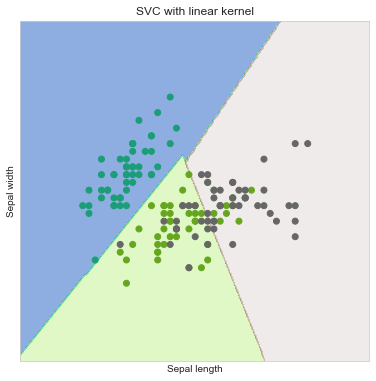

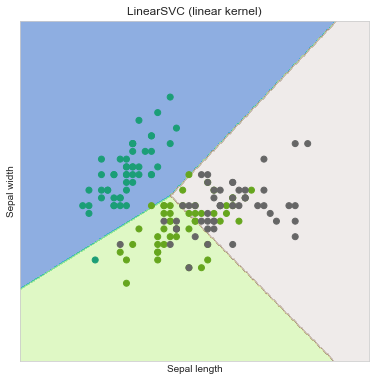

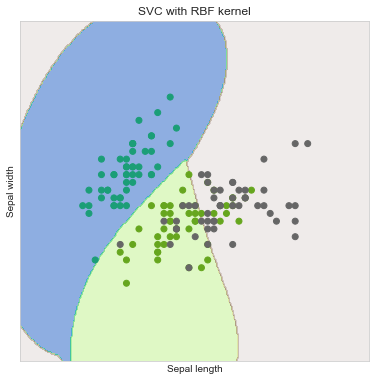

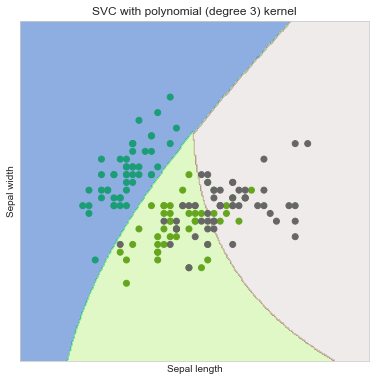

In [118]:
for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    plt.figure(figsize=(15,15))
    # Set the subplot position (Size = 2 by 2, position deifined by i count
    plt.subplot(2, 2, i + 1)
    
    # SUbplot spacing
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    
    # Define Z as the prediction, not the use of ravel to format the arrays
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    
    # Contour plot (filled with contourf)
    plt.contourf(xx, yy, Z, cmap=plt.cm.terrain, alpha=0.5,linewidths=0)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Dark2)
    
    # Labels and Titles
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])
plt.show()